In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/polynomial.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [3]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [4]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [5]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [6]:
df.shape

(6, 3)

In [7]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [15]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2].values
y

array([2.0e-04, 1.2e-03, 6.0e-03, 3.0e-02, 9.0e-02, 2.7e-01])

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

Text(0, 0.5, 'PRESSURE')

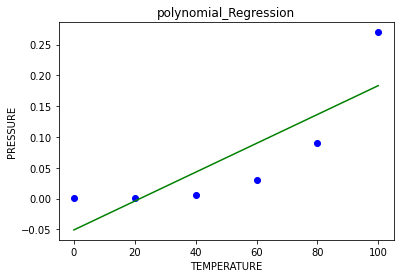

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='green')
plt.title("polynomial_Regression")
plt.xlabel("TEMPERATURE")
plt.ylabel("PRESSURE")

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
print("Error percentage is ",mean_absolute_percentage_error(y,y_pred))


Error percentage is  44.775078189300416


In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [25]:
poly.fit(x_poly,y)
lin2=LinearRegression()
lin2.fit(x_poly,y)
y_poly=lin2.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

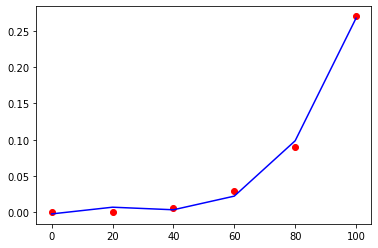

In [26]:
plt.scatter(x,y,color='red')
plt.plot(x,y_poly,color='blue')

In [27]:
df1=pd.DataFrame({'Actual_value':y,'simple_regresssion':y_pred,'polynomial':y_poly})

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
print("polynimial error percentage is ",mean_absolute_percentage_error(y,y_poly))


polynimial error percentage is  2.7865912208444676


In [30]:
from sklearn.metrics import r2_score
print("simple regression score is",r2_score(y,y_poly))
print("polynomial regression r2 score",r2_score(y,y_poly))

simple regression score is 0.9966691251761722
polynomial regression r2 score 0.9966691251761722
